In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
df = pd.read_csv("/home/momo/Downloads/dataset for prec/joined data/joined_data.csv")
df.set_index("datetime")

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,date,precipitation
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01,VNKT,60.7,39.1,50.0,60.7,39.1,49.9,41.7,74.7,0.031,...,NaN,2015-01-01T06:54:15,2015-01-01T17:19:31,0.36,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"44454099999,VNKT,remote,44449099999",2015-01-01,0.8000
2015-01-02,VNKT,71.0,49.9,54.9,71.0,49.3,54.9,48.4,80.1,0.119,...,NaN,2015-01-02T06:54:31,2015-01-02T17:20:12,0.40,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"44454099999,VNKT,remote,44449099999",2015-01-02,0.0000
2015-01-03,VNKT,67.7,48.1,54.8,67.7,47.2,54.7,50.5,86.3,0.036,...,NaN,2015-01-03T06:54:46,2015-01-03T17:20:54,0.43,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"44454099999,VNKT,remote,44449099999",2015-01-03,0.5000
2015-01-04,VNKT,69.9,48.1,54.5,69.9,47.2,54.4,49.6,85.5,0.039,...,NaN,2015-01-04T06:54:58,2015-01-04T17:21:37,0.47,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"44454099999,VNKT,remote,44449099999",2015-01-04,0.5000
2015-01-05,VNKT,64.3,42.7,51.3,64.3,42.7,51.2,45.7,83.2,0.000,...,NaN,2015-01-05T06:55:10,2015-01-05T17:22:20,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"44454099999,VNKT,remote,44449099999",2015-01-05,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-26,VNKT,84.1,71.5,76.7,89.4,71.5,78.1,71.6,85.9,0.382,...,30.0,2025-06-26T05:09:50,2025-06-26T19:03:04,0.03,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"44454099999,VNKT,44449099999",2025-06-26,9.9000
2025-06-27,VNKT,82.3,69.7,76.7,87.0,69.7,78.0,71.1,84.0,0.634,...,30.0,2025-06-27T05:10:09,2025-06-27T19:03:10,0.06,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"44454099999,VNKT",2025-06-27,18.8000
2025-06-28,VNKT,82.3,71.5,76.1,85.2,71.5,76.8,70.5,84.3,0.488,...,10.0,2025-06-28T05:10:28,2025-06-28T19:03:15,0.09,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,VNKT,2025-06-28,3.8000


In [3]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'date', 'precipitation'],
      dtype='object')

In [4]:
# dropping irrelevant features
df.drop(columns=['name' ,'feelslikemax',
       'feelslikemin', 'feelslike','precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth','uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'description', 'icon', 'stations',"date","windgust",'conditions','visibility'],axis=1, inplace=True)

In [5]:
df.shape

(3468, 13)

In [6]:
df

,datetime,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,precipitation
0,2015-01-01,60.7,39.1,50.0,41.7,74.7,5.8,166.0,1020.4,79.1,96.6,8.3,0.8000
1,2015-01-02,71.0,49.9,54.9,48.4,80.1,9.2,26.0,1022.2,93.3,40.4,3.3,0.0000
2,2015-01-03,67.7,48.1,54.8,50.5,86.3,15.7,304.8,1021.0,90.3,58.6,5.0,0.5000
3,2015-01-04,69.9,48.1,54.5,49.6,85.5,9.2,252.4,1018.1,67.1,118.0,10.3,0.5000
4,2015-01-05,64.3,42.7,51.3,45.7,83.2,10.3,213.3,1013.9,41.6,139.2,12.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,2025-06-26,84.1,71.5,76.7,71.6,85.9,11.4,220.1,1011.7,75.9,301.5,26.1,9.9000
3464,2025-06-27,82.3,69.7,76.7,71.1,84.0,12.8,237.0,1010.3,80.1,266.0,23.1,18.8000
3465,2025-06-28,82.3,71.5,76.1,70.5,84.3,11.4,278.3,1009.3,86.4,262.4,22.5,3.8000
3466,2025-06-29,82.3,71.5,73.5,71.4,94.2,16.1,223.2,1006.8,88.0,153.8,13.3,19.9898


In [7]:
# converision = lambda x: round((5/9) * (x - 32),1)
# df["tempmax"] = df["tempmax"].apply(converision)
# df["tempmin"] = df["tempmin"].apply(converision)
# df["temp"] = df["temp"].apply(converision)


In [8]:
df.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'solarradiation', 'solarenergy', 'precipitation'],
      dtype='object')

In [9]:
df.describe()

,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,precipitation
count,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000
mean,76.085294,57.193829,65.385265,56.108333,75.141984,11.262197,212.394319,1015.438379,47.204123,185.324913,15.997030,4.088041
std,7.789576,10.985584,9.146426,11.408154,11.479143,5.879100,57.765426,4.398764,24.038376,58.836834,5.082941,10.769362
min,48.100000,32.100000,44.000000,29.000000,25.200000,3.400000,1.000000,1001.300000,18.800000,0.000000,0.000000,0.000000
25%,69.700000,48.100000,57.175000,45.700000,69.400000,9.200000,184.175000,1012.100000,25.000000,149.875000,12.900000,0.000000
50%,76.900000,58.900000,67.600000,56.300000,76.200000,10.300000,214.900000,1015.800000,36.500000,182.400000,15.700000,0.000000
75%,82.300000,67.900000,73.600000,67.925000,83.300000,12.800000,252.225000,1018.900000,70.100000,224.000000,19.300000,2.422300
max,102.100000,75.100000,81.000000,74.300000,100.000000,165.800000,356.800000,1025.800000,97.000000,340.700000,29.600000,164.300000


In [10]:
# df['temp_diff'] = df.tempmax - df.tempmin
# df = df.drop(columns=['temp_diff'])

In [11]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns =numeric_columns.delete(-1) #delete precipitation as it's target

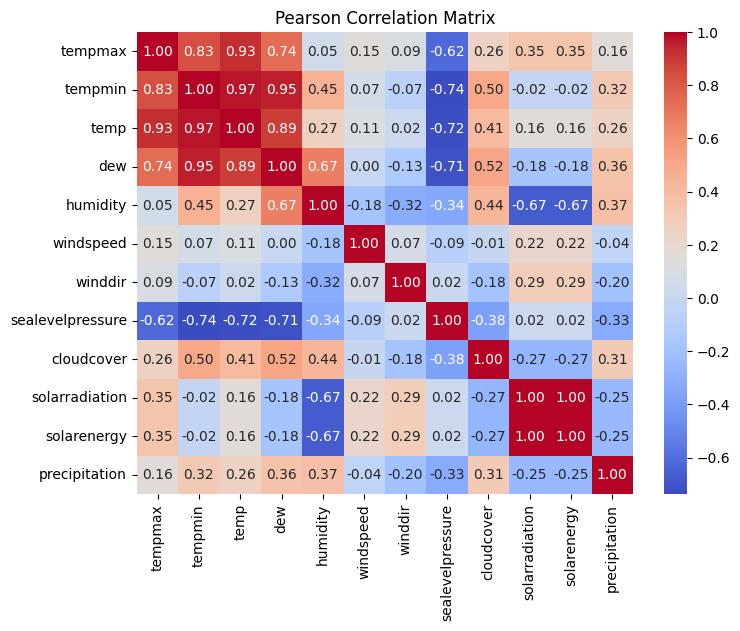

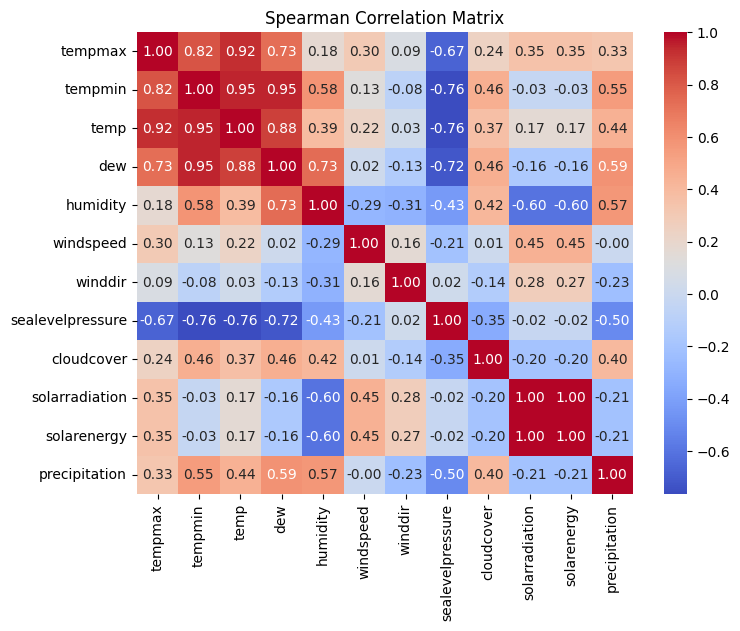

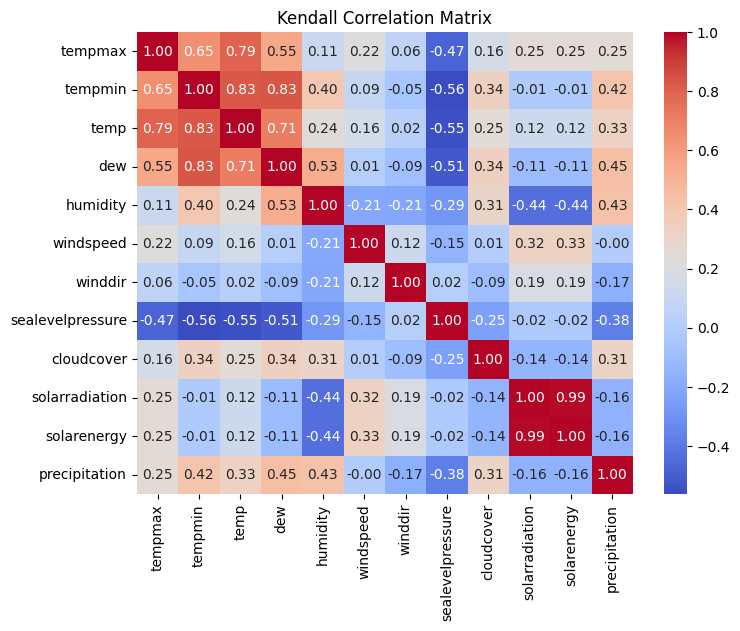

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt

def plot_individual_correlation_matrices(df):
    """
    Plots individual correlation matrices for Pearson, Spearman, and Kendall methods.
    """
    # Compute correlation matrices
    pearson_corr = df.corr(method='pearson')
    spearman_corr = df.corr(method='spearman')
    kendall_corr = df.corr(method='kendall')

    # Function to plot a single heatmap
    def plot_heatmap(corr_matrix, title, cmap='coolwarm'):
        plt.figure(figsize=(8, 6))  # Set the figure size
        sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", cbar=True)
        plt.title(title)  # Add a title
        plt.show()

    # Plot Pearson Correlation Matrix
    plot_heatmap(pearson_corr, "Pearson Correlation Matrix")

    # Plot Spearman Correlation Matrix
    plot_heatmap(spearman_corr, "Spearman Correlation Matrix")

    # Plot Kendall Correlation Matrix
    plot_heatmap(kendall_corr, "Kendall Correlation Matrix")

# Example usage:
# Assuming numeric_columns is a DataFrame with only numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
plot_individual_correlation_matrices(numeric_columns)


<Figure size 800x600 with 0 Axes>

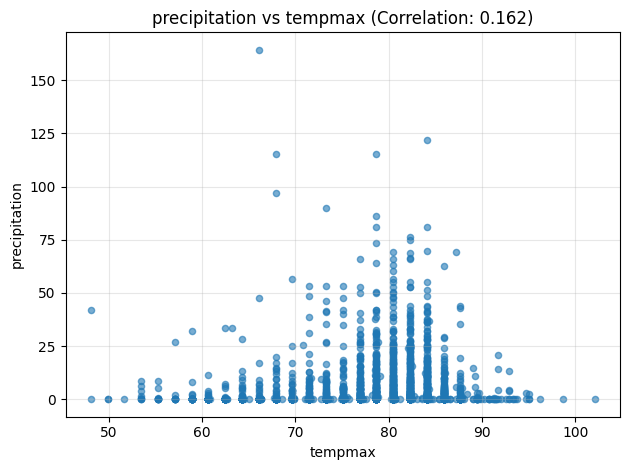

<Figure size 800x600 with 0 Axes>

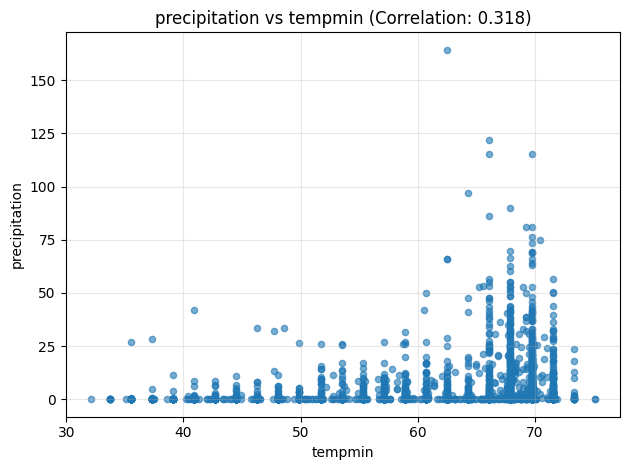

<Figure size 800x600 with 0 Axes>

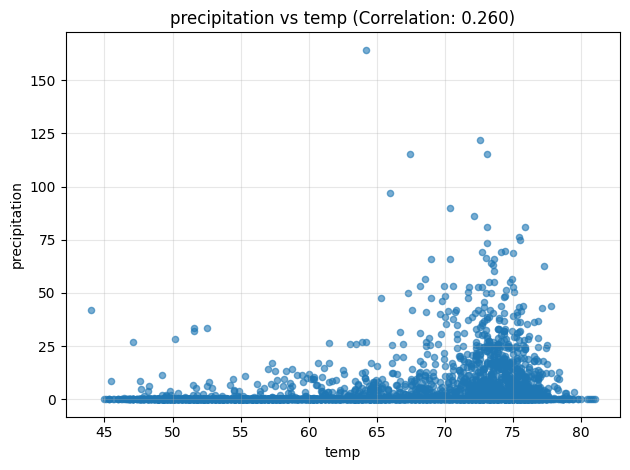

<Figure size 800x600 with 0 Axes>

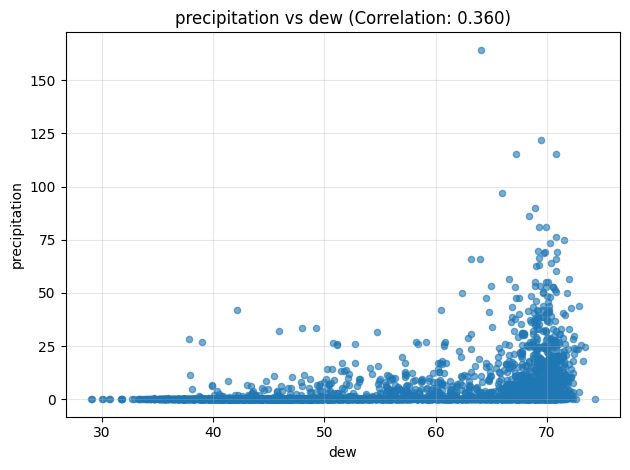

<Figure size 800x600 with 0 Axes>

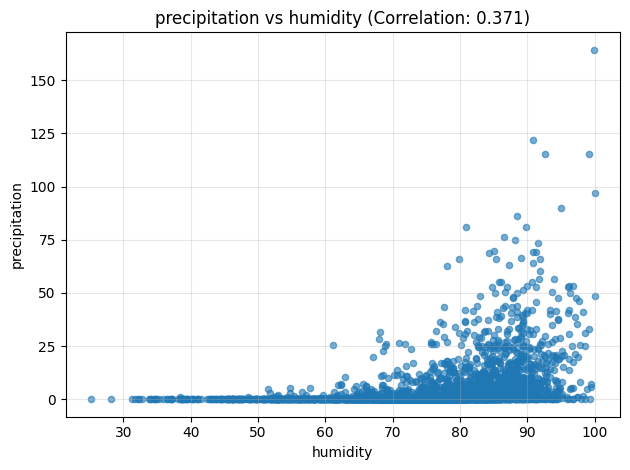

<Figure size 800x600 with 0 Axes>

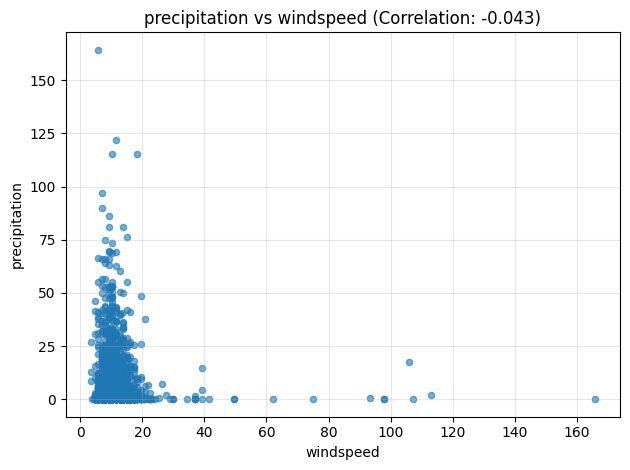

<Figure size 800x600 with 0 Axes>

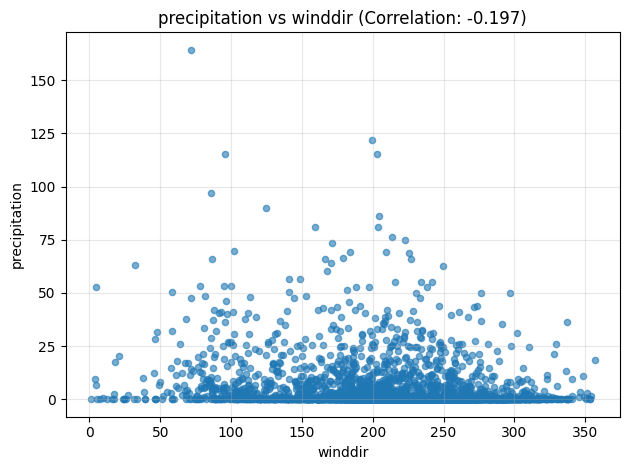

<Figure size 800x600 with 0 Axes>

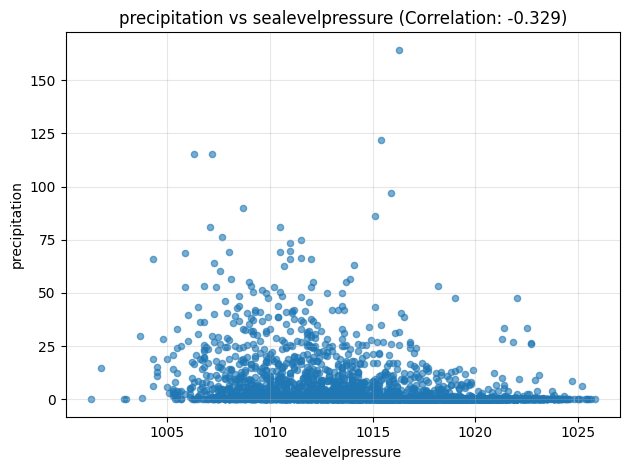

<Figure size 800x600 with 0 Axes>

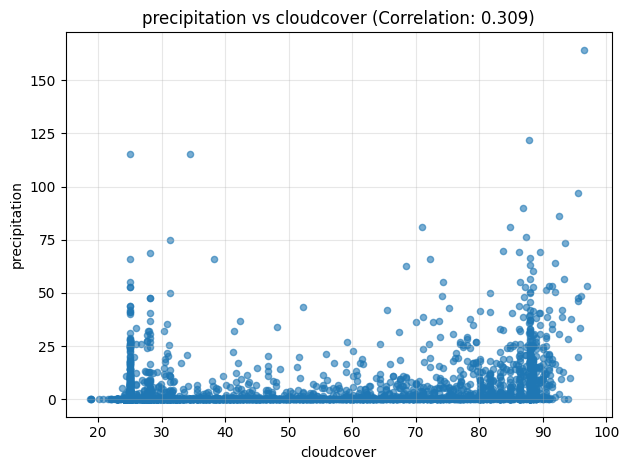

<Figure size 800x600 with 0 Axes>

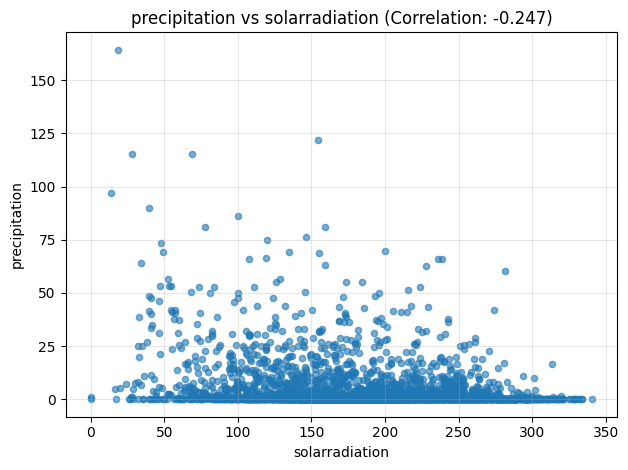

<Figure size 800x600 with 0 Axes>

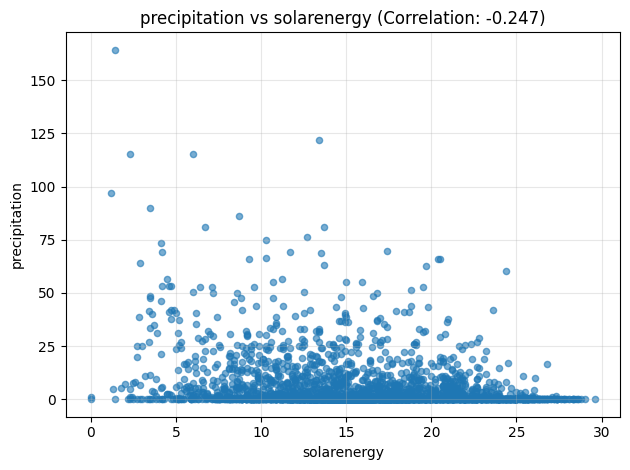

In [13]:
def quick_scatter_plots(df, target_column):
    """Quick scatter plots using pandas built-in plotting"""
    
    other_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                  if col != target_column]
    
    for col in other_cols:
        plt.figure(figsize=(8, 6))
        df.plot.scatter(x=col, y=target_column, alpha=0.6)
        plt.title(f'{target_column} vs {col}')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        # Add correlation in title
        corr = df[target_column].corr(df[col])
        plt.title(f'{target_column} vs {col} (Correlation: {corr:.3f})')
        plt.show()

# Usage
quick_scatter_plots(df, 'precipitation')

###### dropping windspeed, winddir, visibility, solarradiation, solarenergy 

In [14]:
df.drop(columns=["solarradiation"],inplace=True)
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

In [15]:
df.dtypes

datetime             object
tempmax             float64
tempmin             float64
temp                float64
dew                 float64
humidity            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
solarenergy         float64
precipitation       float64
dtype: object

In [16]:
df.shape

(3468, 12)

In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

datetime            0
tempmax             0
tempmin             0
temp                0
dew                 0
humidity            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
solarenergy         0
precipitation       0
dtype: int64

In [19]:
df.to_csv("/home/momo/Downloads/dataset for prec/cleaned_data/01-cleaned.csv",index=False)

In [20]:
df = pd.read_csv("/home/momo/Downloads/dataset for prec/cleaned_data/01-cleaned.csv")
df.head()

,datetime,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,solarenergy,precipitation
0,2015-01-01,60.7,39.1,50.0,41.7,74.7,5.8,166.0,1020.4,79.1,8.3,0.8
1,2015-01-02,71.0,49.9,54.9,48.4,80.1,9.2,26.0,1022.2,93.3,3.3,0.0
2,2015-01-03,67.7,48.1,54.8,50.5,86.3,15.7,304.8,1021.0,90.3,5.0,0.5
3,2015-01-04,69.9,48.1,54.5,49.6,85.5,9.2,252.4,1018.1,67.1,10.3,0.5
4,2015-01-05,64.3,42.7,51.3,45.7,83.2,10.3,213.3,1013.9,41.6,12.0,0.0


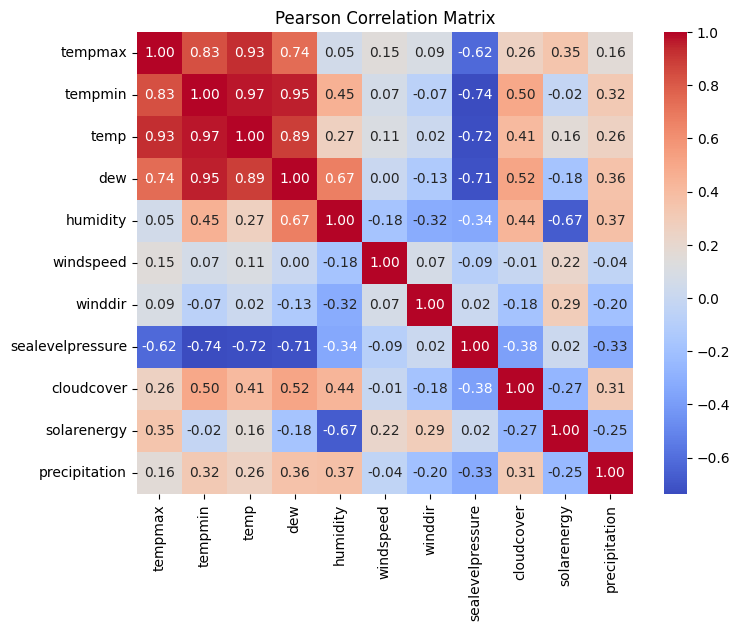

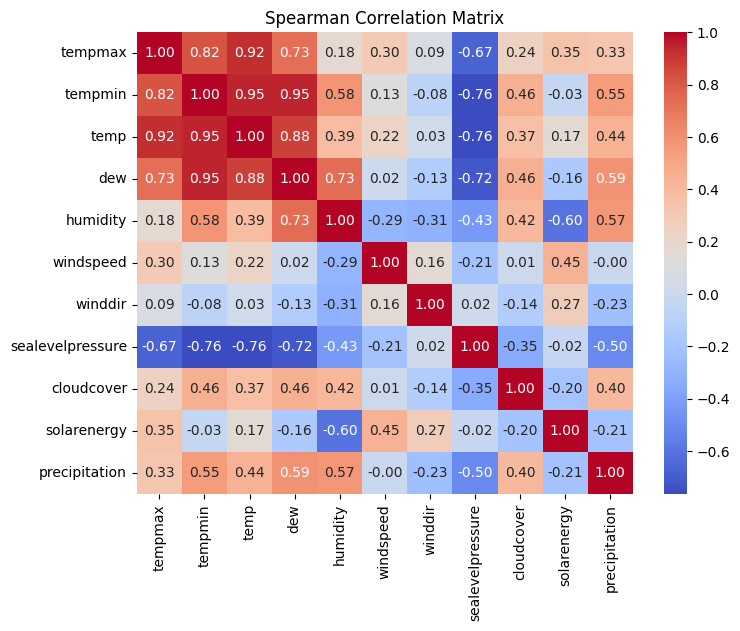

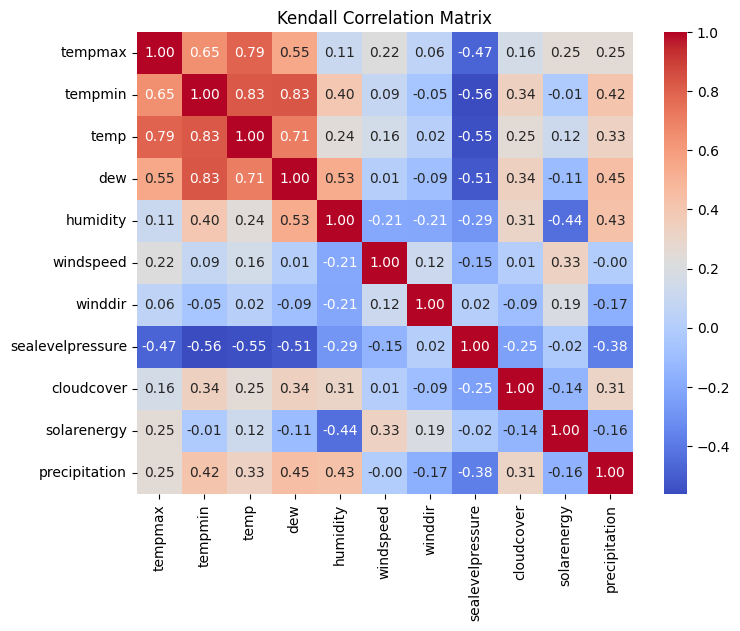

In [21]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Function to plot individual correlation matrices
def plot_individual_correlation_matrices(df):
    """
    Plots individual correlation matrices for Pearson, Spearman, and Kendall methods.
    """
    # Compute correlation matrices
    pearson_corr = df.corr(method='pearson')
    spearman_corr = df.corr(method='spearman')
    kendall_corr = df.corr(method='kendall')

    # Function to plot a single heatmap
    def plot_heatmap(corr_matrix, title, cmap='coolwarm'):
        plt.figure(figsize=(8, 6))  # Set the figure size
        sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", cbar=True)
        plt.title(title)  # Add a title
        plt.show()

    # Plot Pearson Correlation Matrix
    plot_heatmap(pearson_corr, "Pearson Correlation Matrix")

    # Plot Spearman Correlation Matrix
    plot_heatmap(spearman_corr, "Spearman Correlation Matrix")

    # Plot Kendall Correlation Matrix
    plot_heatmap(kendall_corr, "Kendall Correlation Matrix")



# Call the functions
plot_individual_correlation_matrices(numeric_columns)


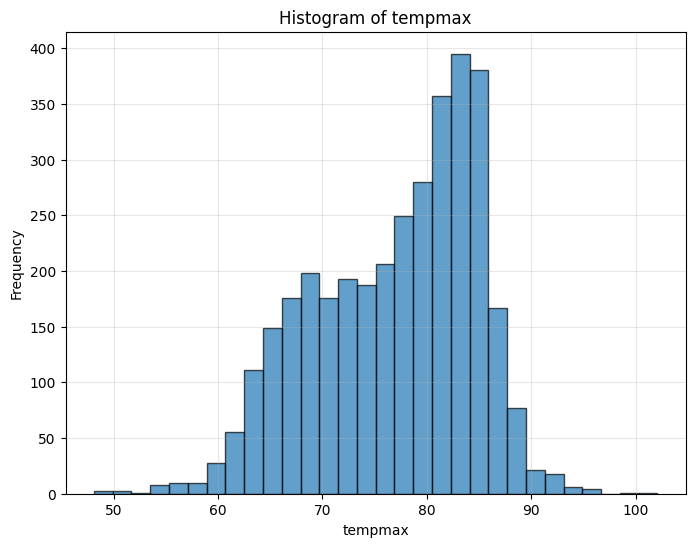

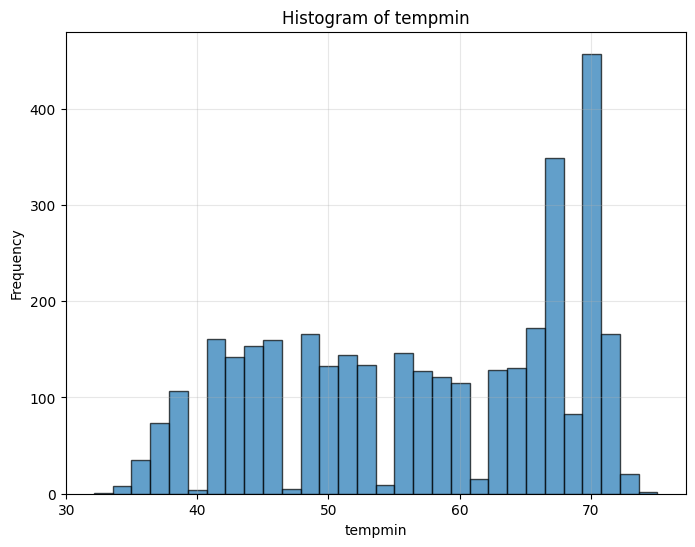

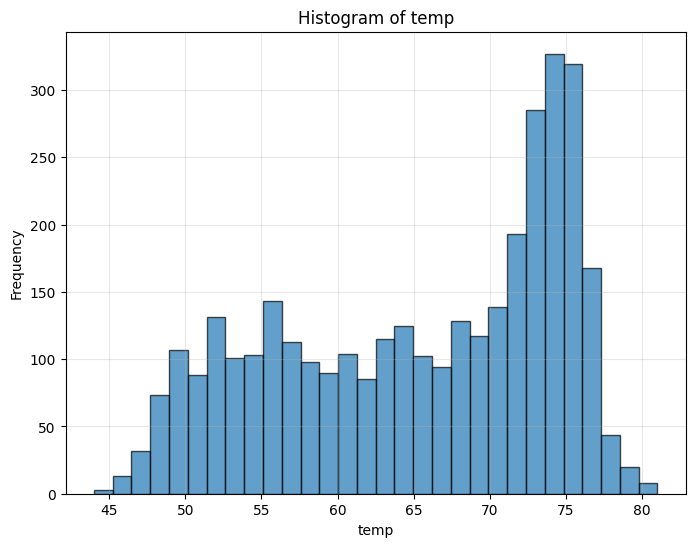

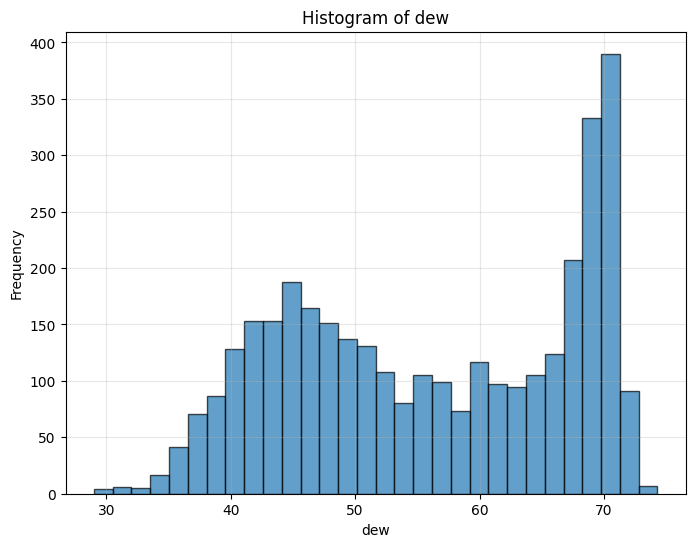

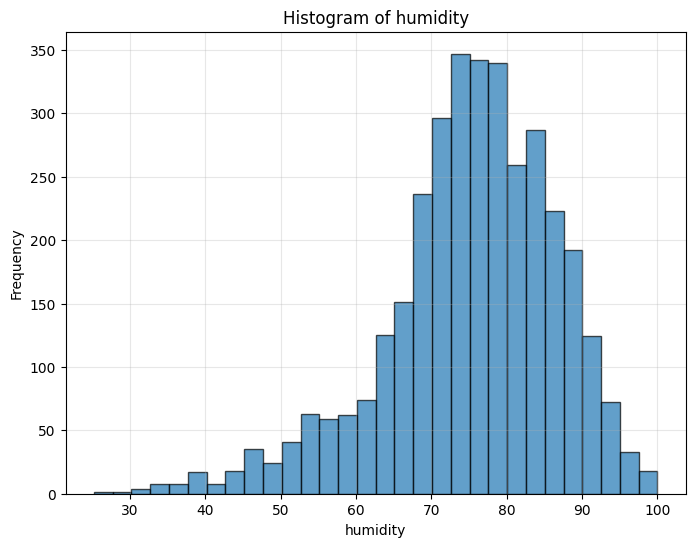

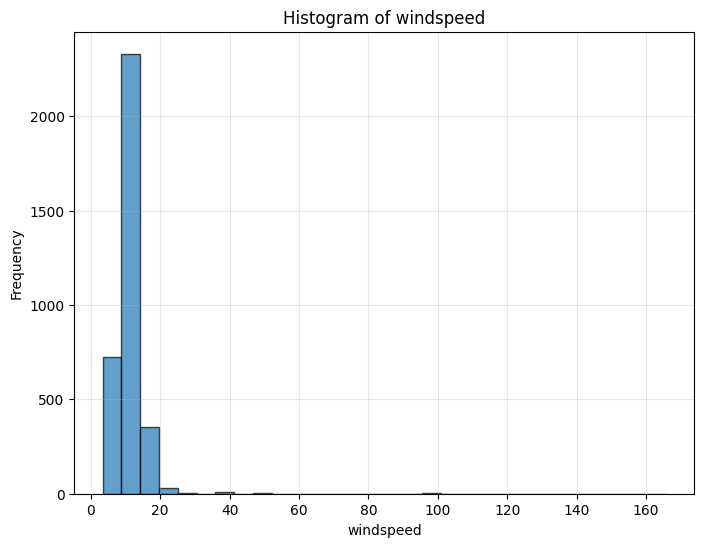

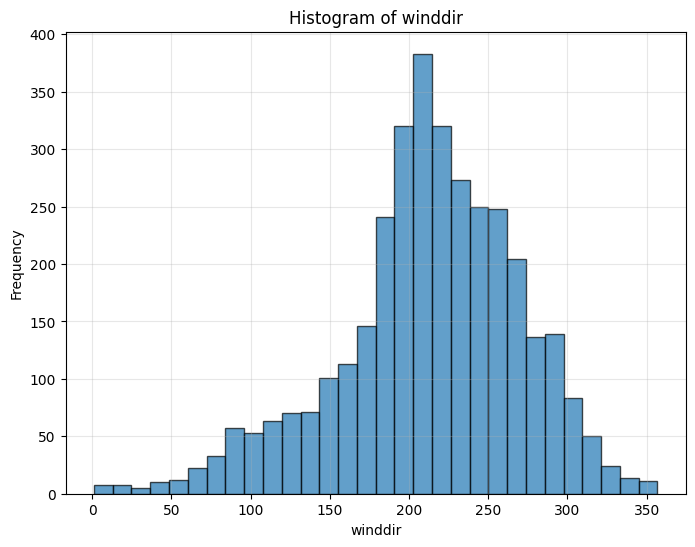

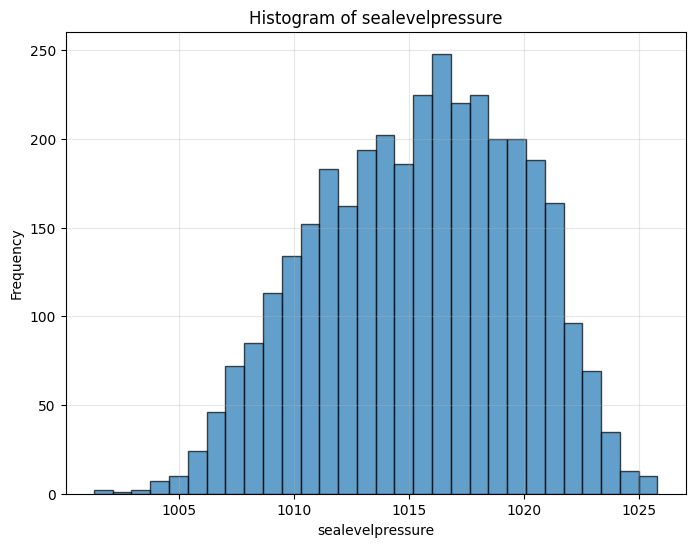

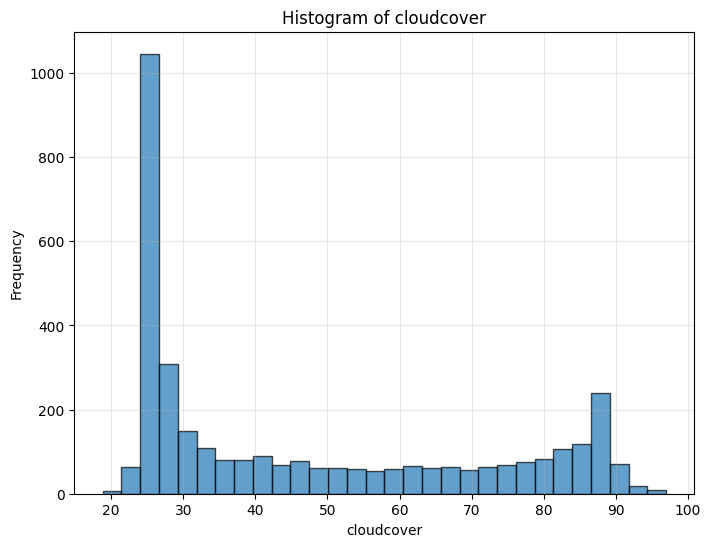

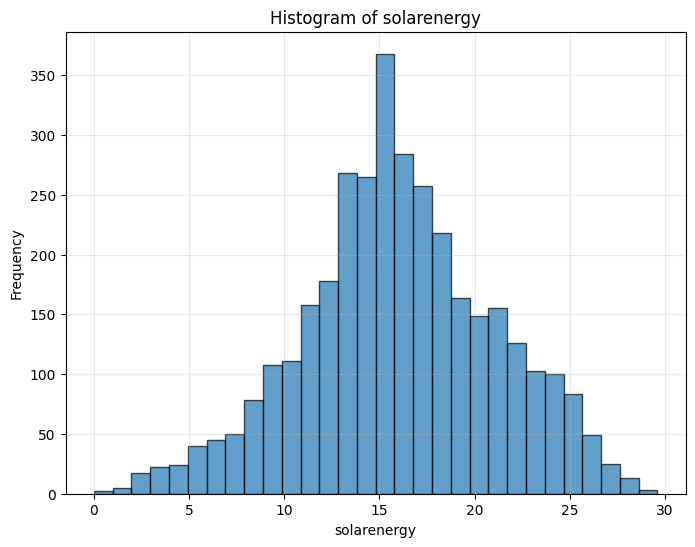

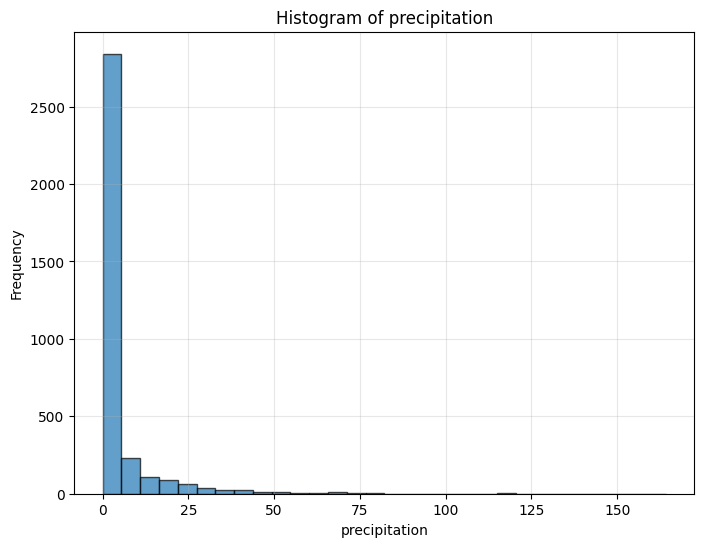

In [22]:
# Create individual plots for each column
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()

In [23]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols.delete(-1) #removing precipitation

Index(['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'solarenergy'],
      dtype='object')

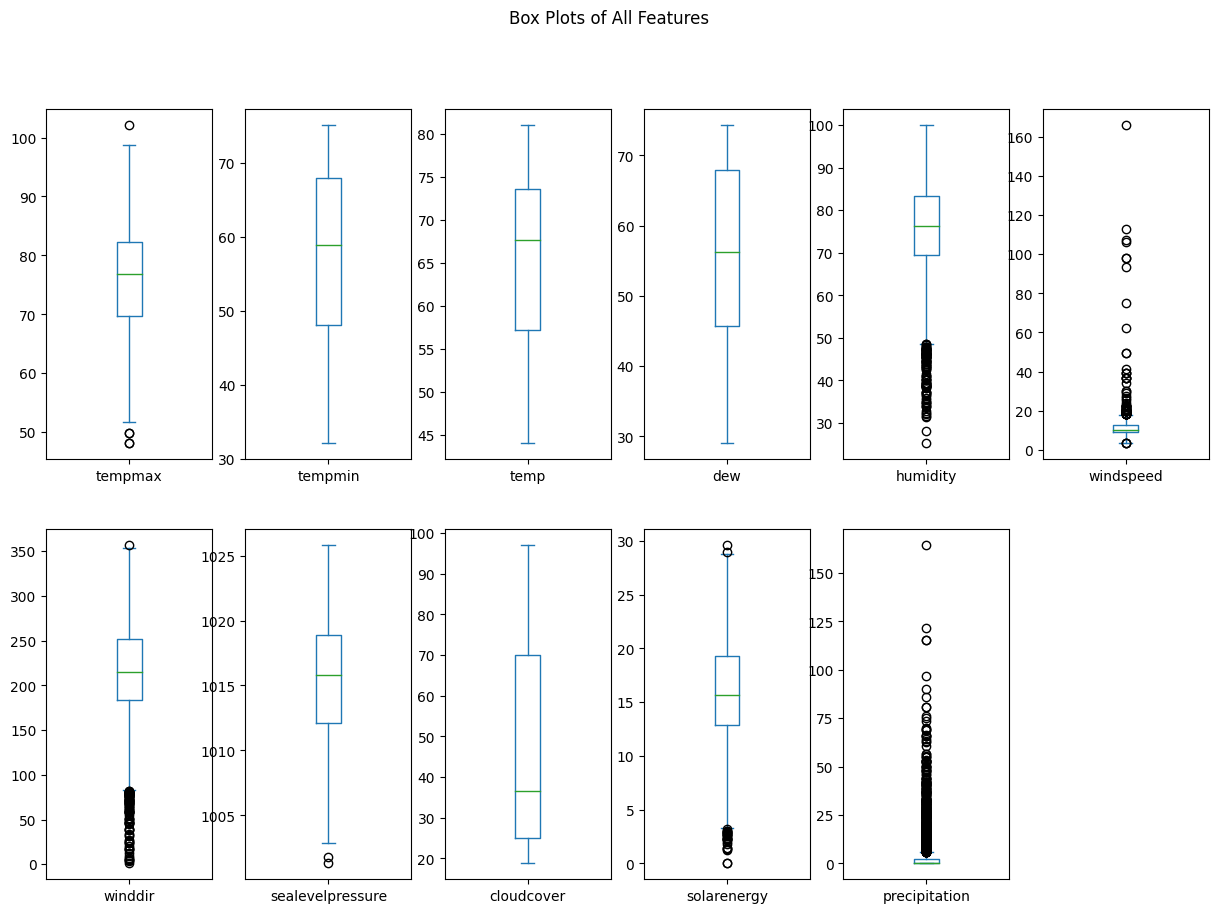

In [24]:
# Simple one-liner
df.plot(kind='box', subplots=True, figsize=(15, 10), layout=(2, 6))
plt.suptitle('Box Plots of All Features')
plt.show()

In [25]:
df

,datetime,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,solarenergy,precipitation
0,2015-01-01,60.7,39.1,50.0,41.7,74.7,5.8,166.0,1020.4,79.1,8.3,0.8000
1,2015-01-02,71.0,49.9,54.9,48.4,80.1,9.2,26.0,1022.2,93.3,3.3,0.0000
2,2015-01-03,67.7,48.1,54.8,50.5,86.3,15.7,304.8,1021.0,90.3,5.0,0.5000
3,2015-01-04,69.9,48.1,54.5,49.6,85.5,9.2,252.4,1018.1,67.1,10.3,0.5000
4,2015-01-05,64.3,42.7,51.3,45.7,83.2,10.3,213.3,1013.9,41.6,12.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
3463,2025-06-26,84.1,71.5,76.7,71.6,85.9,11.4,220.1,1011.7,75.9,26.1,9.9000
3464,2025-06-27,82.3,69.7,76.7,71.1,84.0,12.8,237.0,1010.3,80.1,23.1,18.8000
3465,2025-06-28,82.3,71.5,76.1,70.5,84.3,11.4,278.3,1009.3,86.4,22.5,3.8000
3466,2025-06-29,82.3,71.5,73.5,71.4,94.2,16.1,223.2,1006.8,88.0,13.3,19.9898


In [26]:
df.describe()

,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,solarenergy,precipitation
count,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000
mean,76.085294,57.193829,65.385265,56.108333,75.141984,11.262197,212.394319,1015.438379,47.204123,15.997030,4.088041
std,7.789576,10.985584,9.146426,11.408154,11.479143,5.879100,57.765426,4.398764,24.038376,5.082941,10.769362
min,48.100000,32.100000,44.000000,29.000000,25.200000,3.400000,1.000000,1001.300000,18.800000,0.000000,0.000000
25%,69.700000,48.100000,57.175000,45.700000,69.400000,9.200000,184.175000,1012.100000,25.000000,12.900000,0.000000
50%,76.900000,58.900000,67.600000,56.300000,76.200000,10.300000,214.900000,1015.800000,36.500000,15.700000,0.000000
75%,82.300000,67.900000,73.600000,67.925000,83.300000,12.800000,252.225000,1018.900000,70.100000,19.300000,2.422300
max,102.100000,75.100000,81.000000,74.300000,100.000000,165.800000,356.800000,1025.800000,97.000000,29.600000,164.300000


In [27]:
df

,datetime,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,solarenergy,precipitation
0,2015-01-01,60.7,39.1,50.0,41.7,74.7,5.8,166.0,1020.4,79.1,8.3,0.8000
1,2015-01-02,71.0,49.9,54.9,48.4,80.1,9.2,26.0,1022.2,93.3,3.3,0.0000
2,2015-01-03,67.7,48.1,54.8,50.5,86.3,15.7,304.8,1021.0,90.3,5.0,0.5000
3,2015-01-04,69.9,48.1,54.5,49.6,85.5,9.2,252.4,1018.1,67.1,10.3,0.5000
4,2015-01-05,64.3,42.7,51.3,45.7,83.2,10.3,213.3,1013.9,41.6,12.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
3463,2025-06-26,84.1,71.5,76.7,71.6,85.9,11.4,220.1,1011.7,75.9,26.1,9.9000
3464,2025-06-27,82.3,69.7,76.7,71.1,84.0,12.8,237.0,1010.3,80.1,23.1,18.8000
3465,2025-06-28,82.3,71.5,76.1,70.5,84.3,11.4,278.3,1009.3,86.4,22.5,3.8000
3466,2025-06-29,82.3,71.5,73.5,71.4,94.2,16.1,223.2,1006.8,88.0,13.3,19.9898


In [28]:
df.to_csv("cleaned_data/02-cleaned.csv",index=False)